### Contacts
For any question on the lab lectures please contact me by email at leonardo.cianfanelli@polito.it

### Credits
This notebook was created by Laura Arditti and Leonardo Cianfanelli

## Lecture outline
- Katz and Bonacich centralities
- iterative methods to compute centralities
- network flows
- exercise on algebraic graph theory (if we have time)

# Katz and Bonacich centralities
1. Katz centrality 
$ z =  \frac{1-\beta}{\lambda_W} W' z + \beta \mu $
with $\mu = \mathbf{1}$ and $\beta \in [0,1]$ (typically $\beta = 0.15$)
2. Bonachich centrality 
$ z = (1-\beta)P' z + \beta \mu $
with $\mu = \mathbf{1}$ and $\beta \in [0,1]$ (typically $\beta = 0.15$)

## Summary on centralities
**Degree centrality**: the centrality of a node is proportional to its (in)degree. 
$$
z_i = D_{ii}
$$

**Eigenvector centrality**: it takes into account that connections to more central nodes are more important.

$$
z = \frac{W'z}{\lambda_W}
$$

**Invariant distribution centrality**: it generalizes the eigenvector centrality by taking into account that being connected to nodes that connect to many nodes is less important than being connected to nodes that connect with a few nodes.

$$
z = P'z
$$

**Katz centrality**: it generalizes the eigenvector centrality by assuming that nodes have also an intrinsic centrality. The centrality is the sum of the intrinsic centrality and the centrality given by the network.

$$
z =  \frac{1-\beta}{\lambda_W} W' z + \beta \mu 
$$

**Bonacich centrality (or Page-rank)**: it generalizes the invariant distribution centrality by assuming that nodes have also an intrinsic centrality. The centrality is the sum of the intrinsic centrality and the centrality given by the network.
$$ 
x = (1-\beta)P' x + \beta \mu 
$$

There are two ways to compute Katz and Bonacich centralities: **direct** and **iterative**.
We start by computing those centralities by direct methods for the Zachary's karate club graph.

## Direct method (for didactic purposes)
Direct methods consist in inverting the equation above and computing directly the centrality. Notice that

1. the Katz centrality 
$ z =  (\mathbf{I}-\frac{1-\beta}{\lambda_W} W')^{-1} \beta \mu $

2. and Bonacich centrality 
$ z = (\mathbf{I}-(1-\beta)P')^{-1} \beta \mu $

Note that the inversion can be done because the matrices $\frac{1-\beta}{\lambda_W} W'$ and $(1-\beta)P'$ have spectral radius less than 1


In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

G = nx.karate_club_graph()

# compute matrices of the graph
W = nx.adjacency_matrix(G)
W = W.toarray()
degrees = np.sum(W,axis=1)
D = np.diag(degrees)
P = np.linalg.inv(D) @ W

### Katz centrality: $ z =  (\mathbf{I}-\frac{1-\beta}{\lambda_W} W')^{-1} \beta \mu $

In [2]:
N = G.number_of_nodes() 
beta = 0.15
mu = np.ones((N,1))
# note that the normalization of mu does not influence z, once that the centrality gets normalized

# compute the largest eigenvalue of W
w,v = np.linalg.eig(W)
w = w.real

lambda_max = max(w) 
zk = np.linalg.inv(np.diag(np.ones(N)) - W.T*(1-beta)/lambda_max) * beta @ mu
# normalize the centrality
zk = zk/sum(zk)

# sometimes it proves convenient to collect the centralities in a dictionary 
# with nodes as keys and their centrality as values
zip_iterator = zip(G.nodes(), zk)
zk_dict = dict(zip_iterator)

print(zk_dict)

{0: array([0.06577073]), 1: array([0.04811353]), 2: array([0.05603664]), 3: array([0.03881777]), 4: array([0.01903494]), 5: array([0.02041209]), 6: array([0.02041209]), 7: array([0.03211801]), 8: array([0.04104379]), 9: array([0.02145813]), 10: array([0.01903494]), 11: array([0.01404959]), 12: array([0.01895542]), 13: array([0.04075675]), 14: array([0.02150749]), 15: array([0.02150749]), 16: array([0.01089682]), 17: array([0.02013022]), 18: array([0.02150749]), 19: array([0.02876896]), 20: array([0.02150749]), 21: array([0.02013022]), 22: array([0.02150749]), 23: array([0.03051402]), 24: array([0.0159549]), 25: array([0.01631205]), 26: array([0.01786705]), 27: array([0.02733091]), 28: array([0.02615997]), 29: array([0.02762194]), 30: array([0.03277528]), 31: array([0.03720371]), 32: array([0.05642725]), 33: array([0.06835478])}


In [3]:
# the centralities are in array form because they are the result of the inversion of a matrix, 
# sometimes it can be convienent to convert them to float

zk_list = [];
for i in zk_dict.items():
    # for every item (node,centrality), append to the list the centrality value
    zk_list.append(float(i[1]))

print(zk_list)

[0.0657707315084513, 0.0481135323070601, 0.0560366389579282, 0.03881777026089902, 0.01903494255371434, 0.020412093066857408, 0.0204120930668574, 0.032118011936688555, 0.04104379435164703, 0.021458127318193285, 0.01903494255371434, 0.014049589117485415, 0.018955415406140586, 0.040756753902568915, 0.021507493651199566, 0.021507493651199566, 0.010896821266886136, 0.020130222550204604, 0.021507493651199566, 0.02876896451608496, 0.021507493651199566, 0.020130222550204604, 0.021507493651199566, 0.03051401859610869, 0.015954900331301026, 0.016312047604412783, 0.017867050790284833, 0.027330912966293835, 0.026159967020021373, 0.02762193867145103, 0.03277528038930294, 0.03720370893914576, 0.05642725429171859, 0.06835478495237478]


In [4]:
# create a new dictionary with zk_list as values
zip_iterator = zip(G.nodes(), zk_list)
zk_dict = dict(zip_iterator)

print(zk_dict)

{0: 0.0657707315084513, 1: 0.0481135323070601, 2: 0.0560366389579282, 3: 0.03881777026089902, 4: 0.01903494255371434, 5: 0.020412093066857408, 6: 0.0204120930668574, 7: 0.032118011936688555, 8: 0.04104379435164703, 9: 0.021458127318193285, 10: 0.01903494255371434, 11: 0.014049589117485415, 12: 0.018955415406140586, 13: 0.040756753902568915, 14: 0.021507493651199566, 15: 0.021507493651199566, 16: 0.010896821266886136, 17: 0.020130222550204604, 18: 0.021507493651199566, 19: 0.02876896451608496, 20: 0.021507493651199566, 21: 0.020130222550204604, 22: 0.021507493651199566, 23: 0.03051401859610869, 24: 0.015954900331301026, 25: 0.016312047604412783, 26: 0.017867050790284833, 27: 0.027330912966293835, 28: 0.026159967020021373, 29: 0.02762193867145103, 30: 0.03277528038930294, 31: 0.03720370893914576, 32: 0.05642725429171859, 33: 0.06835478495237478}


### Bonacich centrality
Page rank centrality is the Bonacich centrality with $\mu=\mathbf{1}$ and $\beta=0.15$.

In [5]:
zb = np.linalg.inv(np.diag(np.ones(N)) - P.T*(1-beta)) * beta @ mu
zb = zb/sum(zb)

# transform centralities to float
val = [];
for i in zb:
    val.append(float(i))

zb_list = val
    
# create a dictionary to collect the centralities, with nodes as keys and their centrality as values
zip_iterator = zip(G.nodes(), zb_list)
zb_dict = dict(zip_iterator)

print(zb_dict)

{0: 0.09699728538829477, 1: 0.052876924061145726, 2: 0.057078509488462034, 3: 0.03585985778641138, 4: 0.02197795236458954, 5: 0.02911115467837014, 6: 0.029111154678370138, 7: 0.024490497035282385, 8: 0.02976605608101696, 9: 0.014309397129032916, 10: 0.02197795236458954, 11: 0.009564745492135514, 12: 0.014644892011877124, 13: 0.029536456151913665, 14: 0.014535993997921251, 15: 0.014535993997921251, 16: 0.016784005444189662, 17: 0.014558677209021499, 18: 0.014535993997921251, 19: 0.01960463632565278, 20: 0.014535993997921251, 21: 0.014558677209021497, 22: 0.014535993997921251, 23: 0.03152251477667804, 24: 0.02107603355922282, 25: 0.021006197394493005, 26: 0.015044038082725553, 27: 0.02563976748284797, 28: 0.019573459463828494, 29: 0.026288537695114876, 30: 0.02459015524858012, 31: 0.0371580870691453, 32: 0.07169322600575448, 33: 0.10091918233262577}


## Compute centralities by networkX functions
The function `algorithms.link_analysis.pagerank_alg.pagerank` computes the Page-rank centrality of a given network

In [6]:
zb2_dict = nx.algorithms.link_analysis.pagerank_alg.pagerank(G)

# check if the centrality are normalized
zb2 = np.array(list(zb2_dict.values()))
check = sum(zb2)
print("Normalization:", check, "\n")

# transform values to float
zb2_list = [];
for i in zb2:
    zb2_list.append(float(i))

Normalization: 0.9999999999999999 



Compare the page-rank centrality computed by the inversion formula with the one computed by NetworkX

In [7]:
# for comparison, it is convenient to use centralities as arrays
# before comparing we ensure that the shape of the arrays is the same

print("Shape of zb:", zb.shape)
print("Shape of zb2", zb2.shape)

Shape of zb: (34, 1)
Shape of zb2 (34,)


In [8]:
# since it is not, we reshape zb
zb = zb.reshape(N)

# now we can compute the distance
print("Distance between zb and zb2:", np.linalg.norm(zb-zb2))

Distance between zb and zb2: 7.450450058063852e-06


As expected, the distance between Bonacich centrality computed via direct method and networkX function is negligible.

# Iterative methods
The smartest way to compute Bonacich centrality (or Katz centrality) is to exploit iterative methods.

Consider the dynamics
$$
\begin{cases} 
z(t+1) = (1-\beta)P'z(t) + \beta \mu  \\
z(0) = z_0.
\end{cases}
$$

The transient of the dynamics is

$$
\begin{cases}
z(1) = (1-\beta)P'z(0) + \beta \mu\\
z(2) = (1-\beta)^2 (P')^2 z(0) + (1-\beta)P' \beta \mu + \beta \mu\\
\vdots\\
z(t) = (1-\beta)^t (P')^t z(0) + \sum_{i=0}^{t-1} (1-\beta)^i (P')^i \beta \mu
\end{cases}
$$

The first term vanishes as $t \to +\infty$ because $(1-\beta)P'$ is sub-stochastic, while the second is a geometric sum. The dynamics thus converges to the limit

$$
\lim_{t \to +\infty} z(t) = (\mathbf{I}-(1-\beta) P')^{-1} \beta \mu,
$$

which is the Bonacich centrality of the graph.

**Remark**: you should never use direct ways to compute centralities if iterative algorithms are available. The iterative method is more efficient than the direct one as the order of the graph grows, since it does not involve the inversion of a matrix $N \times N$.

Note that the convergence of $z(t)$ to the Bonacich centrality holds for every initial condition $z(0)$.

In [9]:
# arbitrary initial condition: 1/N-uniform vector of size N
z_0 = np.ones((N,1))/N
# set a tolerance to assess convergence to the limit
tol = 1e-5
# evolve the dynamics
z_old = z_0
print()
while True:
    z_new = P.T @ z_old * (1-beta) + beta * mu
    if np.linalg.norm(z_new-z_old) < tol:
        break
    z_old=z_new

zb_approx = z_new

# normalize the centrality
zb_approx = zb_approx / sum(zb_approx)

print("Approximation of zb_approx: \n", zb_approx)


Approximation of zb_approx: 
 [[0.09699725]
 [0.05287689]
 [0.05707846]
 [0.03585984]
 [0.02197797]
 [0.02911118]
 [0.02911118]
 [0.02449049]
 [0.02976604]
 [0.01430941]
 [0.02197797]
 [0.00956477]
 [0.0146449 ]
 [0.02953644]
 [0.01453601]
 [0.01453601]
 [0.01678403]
 [0.01455869]
 [0.01453601]
 [0.01960464]
 [0.01453601]
 [0.01455869]
 [0.01453601]
 [0.03152251]
 [0.02107605]
 [0.02100621]
 [0.01504405]
 [0.02563977]
 [0.01957346]
 [0.02628854]
 [0.02459015]
 [0.03715808]
 [0.07169319]
 [0.10091913]]


In [10]:
# we now compute the distance between zb and zb_approx
zb_approx = zb_approx.reshape(N)
print("Distance between zb and zb_approx:", np.linalg.norm(zb-zb_approx))

Distance between zb and zb_approx: 1.2257599065489844e-07


## Exercise
Compute the Katz centrality of the Zachary's karate club graph by iterative methods, and compare the results with direct methods.

**Hint**: use the definition of Katz centrality and same techniques as above

In [11]:
# TO DO

# Testing sensitivity of measures
In this section we will check the dependence of centrality measures with respect to their paramenters and the sensitivity of the iterative algorithms to compute such measure with respect to the number of iterations.

## The effect of parameters
In our first experiment we analyze the dependence of Page Rank centrality on the parameter $\alpha=1-\beta$. We set distinct values for $\alpha$ while we fix the number of iterations, and run Page Rank. Then we plot the resulting Page Rank values with respect to $\alpha$.

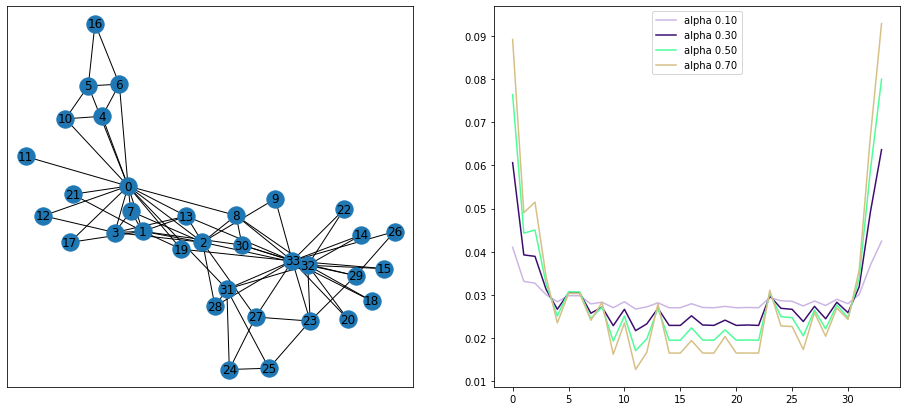

In [12]:
fig = plt.figure(2, figsize=(16,7))
ax1 = plt.subplot(121)
ax2 = plt.subplot(122)

pos = nx.spring_layout(G) 
nx.draw_networkx(G, pos, ax=ax1)

# we consider values for alpha from 0.1 to 0.9 with step size 0.2
alphas = np.arange(0.1, 0.9, 0.2)

for alp in alphas:
    # pagerank has parameters alpha and mu:
    # note that alpha = 1-beta and weight parameters mu are set to 1 by default
    pr = nx.pagerank(G, alpha=alp) 
    prval = list(pr.values())
    ax2.plot(prval, color=np.random.rand(3), label='alpha {0:.2f}'.format(alp))
    
ax2.legend()

### Exercise:
1. explain the previous result. 

**Hint:** keep in mind that the parameter alpha used by `nx.pagerank` corresponds to $1-\beta$, and the centrality $z$ satisfies

$$
z = (1-\beta)P'z + \beta \mu
$$
2. Repeat the analysis. This time keep $\alpha$ fixed to 0.5 and select 3 different non-uniform vectors $\mu$ as `personalization` parameter to `pagerank`. How do you interpret the result?

## The effect of iteration number
In this section we consider a bigger network and we analyse the speed of convergence of iterative algorithms for computing centrality measures. 
 

Download the political blogs network (save it as a .gml file in the working directory of this notebook) and import it as a Graph object. We check the basic properties of G

In [13]:
G = nx.read_gml('polblogs.gml')
print("Type of G:", type(G))

Type of G: <class 'networkx.classes.multidigraph.MultiDiGraph'>


Since G is a multigraph, we define an equivalent graph to compute the centralities (the function 'pagerank' does not work with multigraphs)

In [14]:
GG = nx.Graph()
for n, nbrs in G.adjacency():
    # edict is a dictionary of dictionaries; 
    # the keys of edict are parallel edges from n to nbr;
    # the values of edict are dictionary,
    # containing attribute values of the corresponding edge
    for nbr, edict in nbrs.items(): 
        # each edge has weight=1, so total value is just  
        # the number of parallel edges
        total_value = len(edict) 
        GG.add_edge(n, nbr, weight = total_value)

The graph is very large, thus we cannot plot it.

We now test the convergence speed of `nx.pagerank` algorithm:

Errors: [0.0, 0.0, 0.0]


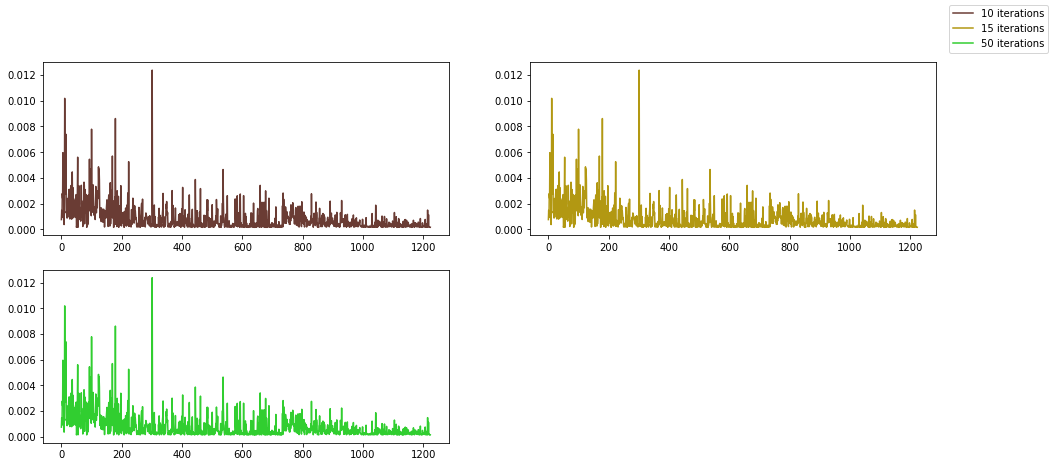

In [15]:
fig = plt.figure(1, figsize=(16,7))

# set 3 iteration numbers
iters = [10,15,50]
# define the position of the next plot in the subplot grid
position = 1
# create a list to collect the page rank values obtained in the three runs 
prvals = []

for max_iter in iters:
    # compute page rank
    pr = nx.pagerank(GG, max_iter = max_iter) 
    # compute page rank values
    prval = list(pr.values())
    # append the result to the list
    prvals.append(np.array(prval)) 
    # create a new sublot in the grid
    ax = fig.add_subplot(2,2,position)
    # plot the PR values
    ax.plot(prval, color=np.random.rand(3), label='{0:d} iterations'.format(max_iter))
    position+=1

# add a legend which contains all label
# informations specified in previous plot calls
fig.legend()  
# we assume the values obtained with nx.pagerank()
# with no iterations constraints as a benchmark
benchmark = np.array(list(nx.pagerank(GG).values())) 
# we compute errors as norm of the differences wrt the benchmark
errors = [np.linalg.norm(prval-benchmark) for prval in prvals]
print("Errors:", errors)

`nx.pagerank` algorithm converges very fast, in 10 iterations! 

### Exercise
Check if our iterative algorithm for computing Bonacich centrality is as good as this by performing a similar analysis.

In [16]:
# TO DO

## An interpretation of Katz (and Bonacich) centrality
Bonacich centrality (as well as Katz centrality) can be interpreted in terms of paths on the graphs.
We show this by an example.

We shall make use of an undirected graph and Katz centrality to simplify the analysis.

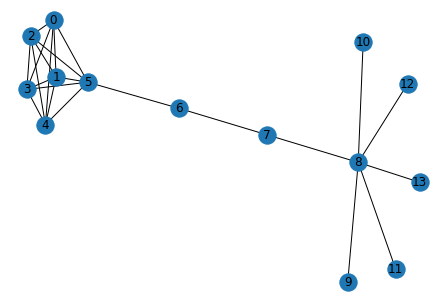

In [17]:
G = nx.lollipop_graph(6,3)
G.add_edges_from([(9,8),(10,8),(11,8),(12,8),(13,8)])

pos = nx.spring_layout(G) 
nx.draw(G, pos, with_labels = True)

N = len(G)

# compute matrices of the graph
W = nx.adjacency_matrix(G)
W = W.toarray()
degrees = np.sum(W,axis=1)
D = np.diag(degrees)
P = np.linalg.inv(D) @ W

# compute the largest eigenvalue of W
w,v = np.linalg.eig(W)
w = w.real

lambda_max = max(w) 

We start with a uniform centrality distribution, and consider uniform $\mu$.

In [18]:
mu = np.ones((N,1))
beta = 0.15
# initial centrality distribution
z = np.ones((N,1))/N
z_reshape = z.reshape(N)

nodesize=z_reshape*7000

print("Centralities at iteration 0:", z_reshape)

Centralities at iteration 0: [0.07142857 0.07142857 0.07142857 0.07142857 0.07142857 0.07142857
 0.07142857 0.07142857 0.07142857 0.07142857 0.07142857 0.07142857
 0.07142857 0.07142857]


Note that normalizing $\mu$ does not modify the centrality, since in
$$ 
z =  (\mathbf{I}-\frac{1-\beta}{\lambda_W} W')^{-1} \beta \mu 
$$
$\mu$ affects the normalization of $z$ only (same argument holds for the Bonacich centrality). 

However, the normalization of $\mu$ affects the transient of the iteration to compute $z$. In particular, if one considers the Bonacich centrality, using $\mu$ such that $\mathbf{1}' \mu = 1$ is preferable, since it guarantees that, if $\mathbf{1}' z(0)=1$, then $\mathbf{1}' z(t)=1$ for every $t$. Indeed,

$$
\mathbf{1}' z(t+1) = (1-\beta) \mathbf{1}' P' z(t) + \beta \mathbf{1}'\mu = (1-\beta) \mathbf{1}' z(t) + \beta = (1-\beta) + \beta = 1
$$

### Back to Katz centrality

After 1 iteration,
$$
z(1) = \frac{(1-\beta)}{\lambda_W}W'z(0) + \beta \mu,
$$

which means that the centrality of a node is the a combination of its intrinsic centrality, and the centrality of the neighbors. Since the intrinsic centrality is the same for every node, if we start with a uniform $z(0)$, $z(1)$ depends only on the degree of the node.

Similar observation can be made for the Bonacich centrality.

Centralities at iteration 1: [0.21028569 0.21028569 0.21028569 0.21028569 0.21028569 0.22234283
 0.17411428 0.17411428 0.22234283 0.16205714 0.16205714 0.16205714
 0.16205714 0.16205714]


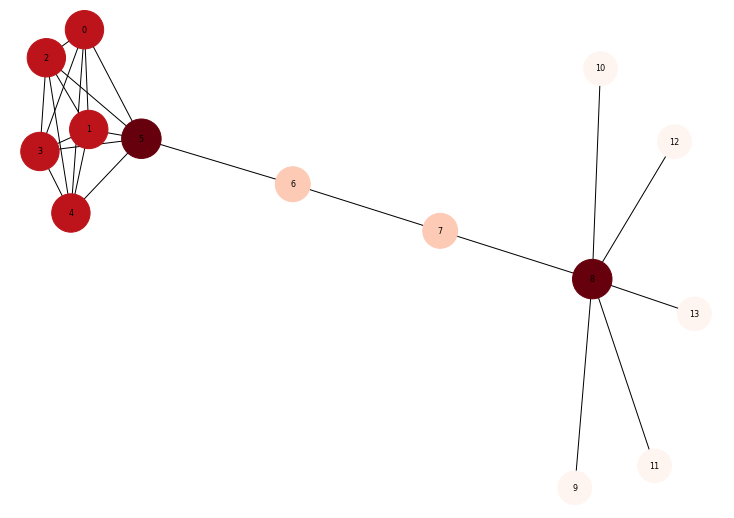

In [19]:
# after 1 iteration
z = W.T @ z * (1-beta)/lambda_max + beta * mu

z_reshape = z.reshape(N)

nodesize=z_reshape*7000

# plot centrality at iteration 0
plt.figure(1, figsize=(10,7))
# we draw the graph with same node position "pos" defined above
nx.draw(G,pos,
         with_labels=True,
         nodelist=list(G.nodes()), 
         # node size is proportional to centrality value
         node_size = nodesize, 
         # node's color reflects centrality values (higher dc = darker color)
         node_color=z_reshape,
         font_size=8,
         # node's colors are on the red scale
         cmap=plt.cm.Reds) 

print("Centralities at iteration 1:", z_reshape)

As the number of iteration grows, $z(n)$ takes into account also nodes at greater distance.

At the equilibrium, the centrality $z^*$ can be interpreted in terms of paths as follows:

\begin{equation}
\begin{aligned}
z^*&=\lim_{n \to +\infty}z(n)=\sum_{n = 0}^{\infty} \left(\frac{(1-\beta)}{\lambda_W}\right)^n (W')^n \beta \mu \\
   &= \beta \mu + \frac{(1-\beta)}{\lambda_W} (W') \beta \mu + \left(\frac{(1-\beta)}{\lambda_W}\right)^2 (W')^2 \beta \mu + \cdots
\end{aligned}
\end{equation}

If one considers node $i$

$$
z^*_i = \beta \mu_i + \frac{(1-\beta)}{\lambda_W}\beta \sum_{j} (W')_{ij} \mu_j + \left(\frac{(1-\beta)}{\lambda_W}\right)^2 \beta \sum_{j} ((W')^2)_{ij} \mu_j + \cdots
$$

**Interpretation**. Since $((W')^n)_{ij}$ is the number of paths of length 'n' from 'j' to 'i', the centrality of node 'i' is the sum of:
- its intrinsic centrality, plus 
- the intrinsic centrality of its neighbors, plus 
- the intrinsic centrality of the nodes connected by paths of length 2, and so on... 

Longer paths have a decreasing weight due to the term $(1-\beta)^n$.

**Question**: which node do you expect to have a higher Katz centrality? Why?

[0.12326782 0.12326782 0.12326782 0.12326782 0.12326782 0.12986722
 0.04569536 0.03351863 0.04555341 0.02580526 0.02580526 0.02580526
 0.02580526 0.02580526]


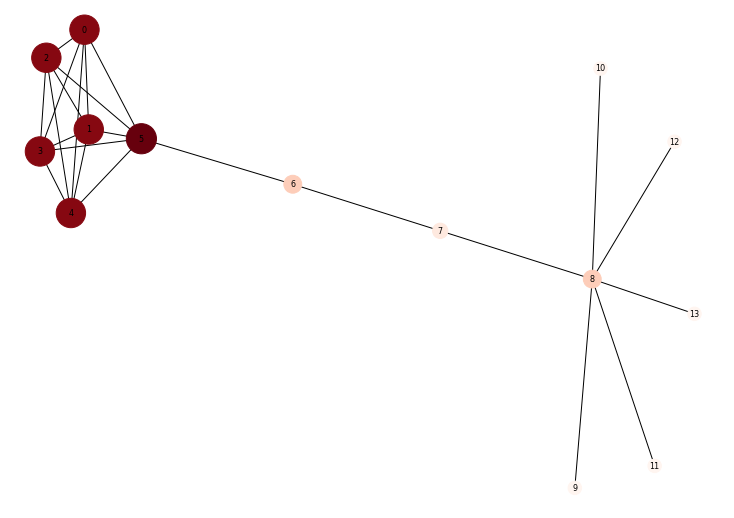

In [20]:
# direct method for Katz (do not use direct method in homeworks!!!)

zk = np.linalg.inv(np.diag(np.ones(N)) - W.T*(1-beta)/lambda_max) * beta @ mu
# normalize the centrality
zk = zk/sum(zk)
zk = zk.reshape(N)

print(zk)

plt.figure(1, figsize=(10,7))
# we draw the graph with same node position "pos" defined above
nx.draw(G,pos,
         with_labels=True,
         nodelist=list(G.nodes()), 
         # node size is proportional to centrality value
         node_size = zk*7000, 
         # node's color reflects centrality values (higher dc = darker color)
         node_color=zk,
         font_size=8,
         # node's colors are on the red scale
         cmap=plt.cm.Reds) 

**Question**: how do you expect to be modified the centralities when using Bonacich instead of Katz? Focus on node 8.

**Hint**: recall the definition of the two centralities, i.e.,

- Katz: $z =  \frac{1-\beta}{\lambda_W} W' z + \beta \mu$
- Bonacich: $x = (1-\beta)P' x + \beta \mu$ 

[0.12326782 0.12326782 0.12326782 0.12326782 0.12326782 0.12986722
 0.04569536 0.03351863 0.04555341 0.02580526 0.02580526 0.02580526
 0.02580526 0.02580526]


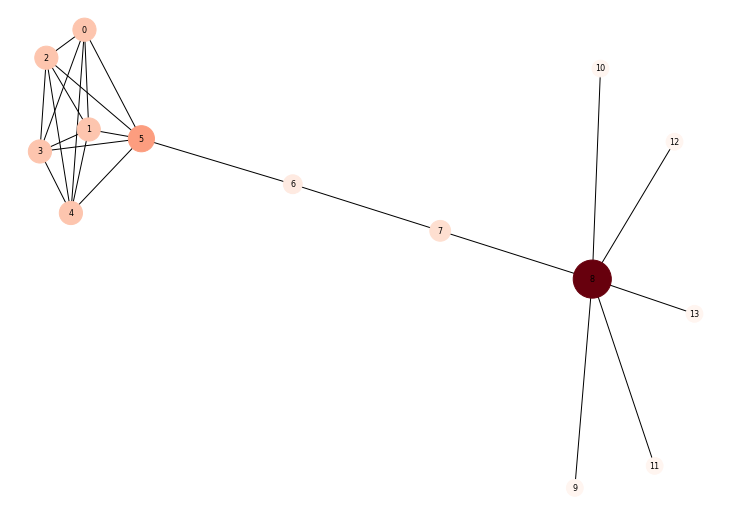

In [21]:
zb_dict = nx.algorithms.link_analysis.pagerank_alg.pagerank(G)

# check if the centrality are normalized
zb = np.array(list(zb_dict.values()))

print(zk)

plt.figure(1, figsize=(10,7))
# we draw the graph with same node position "pos" defined above
nx.draw(G,pos,
         with_labels=True,
         nodelist=list(G.nodes()), 
         # node size is proportional to centrality value
         node_size = zb*7000, 
         # node's color reflects centrality values (higher dc = darker color)
         node_color=zb,
         font_size=8,
         # node's colors are on the red scale
         cmap=plt.cm.Reds) 

## Exercise

Compute all the centralities for the this graph, plot them, and comment the results.

**Hint**: use the code introduced in the lectures to compute the degree, eigenvector, Katz and Bonacich centralities. For the invariant distribution centrality use the function `np.linalg.eig()` to find the invariant distribution of $P$. Use the code introduced in the last lecture to plot the centralities.

In [22]:
# TO DO

# Flows on graphs
In this lab we discuss how maximum admissible flows on a capacitated network are related with cuts in the network by the Max Flow - Min Cut theorem. 

Let us start with the definition of flows from a source 's' to a destination 't' (called terminal nodes).

**Definition**: a s-t flow is a distribution such that:
- for every non-terminal node the incoming flow equals the outcoming flow (mass conservation);
- the outcoming flow from 's' equals the incoming flow to 't' (this quantity is called 'throughput').

### Example
The blue edge labels indicate the flow along the edge.

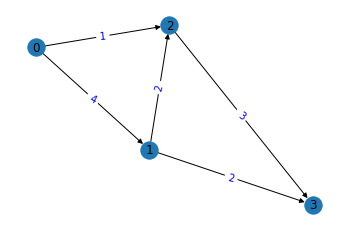

In [23]:
G = nx.DiGraph()
G.add_edges_from([(0,1),(0,2),(1,2),(2,3),(1,3)])

pos = nx.spring_layout(G)

# script to draw edge labels
nx.draw_networkx_edge_labels(G,pos,edge_labels={(0,1):'4',
(0,2):'1',(1,2):'2',(1,3):'2',
(2,3):'3'},font_color='blue')

nx.draw(G, pos, with_labels = True)

Observe that the flow distribution labelled in blue is a flow from 0 to 3. Indeed,
- for the non-terminal nodes 1 and 2, the incoming flow equals the outcoming flow;
- the total flow outcoming from 0 equals the total flow incoming to 3 (the throughput is 5).

## Max Flow - Min Cut Theorem and the Ford Fulkerson algorithm
It is given a graph $G = (V, E)$ which represents a flow network and two vertices source ‘s’ and sink ‘t’ in it. Every edge $(u,v)$ has a capacity $c(u,v)$. We want to find the maximum possible flow from s to t with the following constraint:

1. Flow on an edge doesn’t exceed the given capacity of the edge.

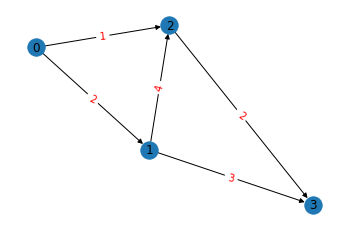

In [24]:
nx.draw_networkx_edge_labels(G,pos,edge_labels={(0,1):'2',
(0,2):'1',(1,2):'4',(1,3):'3',
(2,3):'2'},font_color='red')

nx.draw(G, pos, with_labels = True)

**Question**: consider the graph above with terminal nodes 0 and 3, where the red labels denote the capacity of the edge, i.e., the maximal flow that can be sent along the edge. What is the maximal flow that can be send from 0 to 3?

**Question**: give an intuitive answer on why a flow of throughput 4 cannot be sent.

**Definition (cut of a network)**: a s-t cut of the network $G=(N,E)$ is a partition of the nodes $\{U,U^C\}$, such that $s \in U$ and $t \in U_C$.

We shall see that the notion of cut is strongly related to the maximal flow that can be sent in the network. The cuts of the network above are:
- $U=\{0,1,2\},U^C=\{3\}$
- $U=\{0,1\},U^C=\{2,3\}$
- $U=\{0,2\},U^C=\{1,3\}$
- $U=\{0\},U^C=\{1,2,3\}$

**Definition (cut capacity)**: the capacity of a cut $\{U,U^C\}$ is
$$
C_{U} = \sum_{i \in U}\sum_{j \in U^C} c(i,j)
$$

**Max flow min cut Theorem**: the maximal flow that can send from 's' to 't' equals the minimal cut capacity among the s-t cuts of the network. 

**Back to the question**:
- $U=\{0,1,2\},U^C=\{3\}$ -> $C_U = 5$
- $U=\{0,1\},U^C=\{2,3\}$ -> $C_U = 8$
- $U=\{0,2\},U^C=\{1,3\}$ -> $C_U = 4$
- $U=\{0\},U^C=\{1,2,3\}$ -> $C_U = 3$

**Answer**: the 0-3 min-cut has capacity 3, thus the maximal flow from 0 to 3 is 3.

NetworkX has many functions useful for flow applications, e.g., `networkx.algorithms.flow.maximum_flow` and `networkx.algorithms.flow.minimum_cut`, which compute the maximum throughput and the value and the node partition of a minimum cut, respectively.

In [25]:
# to find the maximal flow, the edges have to be labelled with a 'capacity' label
# we then modify the graph in such a way to include this information 
# (check the `networkx.algorithms.flow.maximum_flow` documentation for more info)

G[0][1]['capacity'] = 2
G[0][2]['capacity'] = 1
G[1][2]['capacity'] = 4
G[1][3]['capacity'] = 3
G[2][3]['capacity'] = 2

nx.algorithms.flow.maximum_flow(G,0,3)

# maximum_flow returns the maximal throughput, plus a dictionary containing the value of the flow that went through each edge.

(3, {0: {1: 2, 2: 1}, 1: {2: 0, 3: 2}, 2: {3: 1}, 3: {}})

In [26]:
nx.algorithms.flow.minimum_cut(G,0,3)

(3, ({0}, {1, 2, 3}))

## Intervention in capacitated networks: two dual problems

### Adversarial intervention
**Question**: suppose you are an adversarial agent that aims at minimizing the flow that can be send from 0 to 3 by removing capacity subject to a budget constraint (or even disconnect the network). 
- Where do you remove the capacity? 
- What is the minimal capacity that you need to remove in order to disconnect the network?

**Answer** 
- Since the bottleneck of the flow is the min-cut of the network, the adversary should reduce the capacity of such a  cut. Thus, in this case, the adversary should reduce capacity of edges between the sets $\{0\}$ and the set $\{1,2,3\}$, which are $(0,1)$ and $(0,2)$. 
- The minimal capacity that needs to be removed equals the capacity of the min-cut of the network, which is 3.

While for this network the answer could be obvious, when the network is large the algorithms `networkx.algorithms.flow.maximum_flow` and `networkx.algorithms.flow.minimum_cut` are very useful!

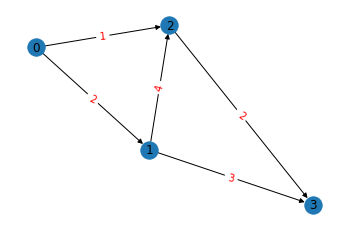

In [27]:
nx.draw_networkx_edge_labels(G,pos,edge_labels={(0,1):'2',
(0,2):'1',(1,2):'4',(1,3):'3',
(2,3):'2'},font_color='red')

nx.draw(G, pos, with_labels = True)

**Cuts**
- $U=\{0,1,2\},U^C=\{3\}$ -> $C_U = 5$
- $U=\{0,1\},U^C=\{2,3\}$ -> $C_U = 8$
- $U=\{0,2\},U^C=\{1,3\}$ -> $C_U = 4$
- $U=\{0\},U^C=\{1,2,3\}$ -> $C_U = 3$

## Planner intervention
**Question**: Suppose you are a planner that aims at maximing the flow that can be send from 0 to 3. 
- Where do you allocate the capacity?

**Answer**: 
- you should allocate the capacity in such a way that the capacity of the mincut is maximized.

### Practical example

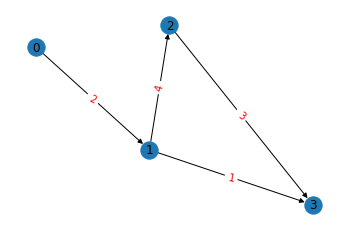

In [28]:
G.remove_edge(0,2)

nx.draw_networkx_edge_labels(G,pos,edge_labels={(0,1):'2',(1,2):'4',(1,3):'1',
(2,3):'3'},font_color='red')

nx.draw(G, pos, with_labels = True)

**Problem**: suppose you can allocate a capacity 4 (that can be distributed on several links). Where do you allocate it?

**Solution**: first compute the capacity of the cuts:
- $U=\{0,1,2\},U^C=\{3\}$ -> $C_U = 4$
- $U=\{0,1\},U^C=\{2,3\}$ -> $C_U = 5$
- $U=\{0,2\},U^C=\{1,3\}$ -> $C_U = 5$
- $U=\{0\},U^C=\{1,2,3\}$ -> $C_U = 2$

The min-cut is $\{0\},\{1,2,3\}$, thus the capacity should be allocated on the links between these set, i.e., on $(0,1)$.

Is allocating capacity 4 on $(0,1)$ optimal? NO!

In such a case, the cut capacities become:

- $U=\{0,1,2\},U^C=\{3\}$ -> $C_U = 4$
- $U=\{0,1\},U^C=\{2,3\}$ -> $C_U = 5$
- $U=\{0,2\},U^C=\{1,3\}$ -> $C_U = 5$
- $U=\{0\},U^C=\{1,2,3\}$ -> $C_U = 6$

and the corresponding throughput is 4.

Note instead that after allocating a capacity 2 on edge $(0,1)$, the cut capacities become

- $U=\{0,1,2\},U^C=\{3\}$ -> $C_U = 4$
- $U=\{0,1\},U^C=\{2,3\}$ -> $C_U = 5$
- $U=\{0,2\},U^C=\{1,3\}$ -> $C_U = 5$
- $U=\{0\},U^C=\{1,2,3\}$ -> $C_U = 4$,

with still a capacity 2 to be allocated. This remaining capacity should be allocated on both the first and the last cut, so the final solution is to allocate capacity 3 on the edge $(0,1)$, and 1 on the edge $(1,3)$ or $(2,3)$, which leads to cuts

- $U=\{0,1,2\},U^C=\{3\}$ -> $C_U = 5$
- $U=\{0,1\},U^C=\{2,3\}$ -> $C_U = 5$
- $U=\{0,2\},U^C=\{1,3\}$ -> $C_U = 5$
- $U=\{0\},U^C=\{1,2,3\}$ -> $C_U = 5$,

and maximal throughput 5.

### Practical example 2
In some cases, it is possible that the capacity of two min-cuts can be increased by improving only one edge.
Consider the following example:

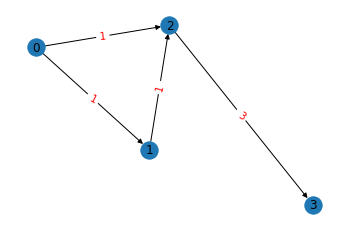

In [29]:
G.add_edge(0,2)
G.remove_edge(1,3)

nx.draw_networkx_edge_labels(G,pos,edge_labels={(0,1):'1',(0,2):'1',(1,2):'1',
(2,3):'3'},font_color='red')

nx.draw(G, pos, with_labels = True)

**Question**: what is the maximal throughput that can be send from 0 to 3?

The answer could be given by using NetworkX functions, but we do not use it now.

**Answer**: we start by computing the cut capacities:

- $U=\{0,1,2\},U^C=\{3\}$ -> $C_U = 3$
- $U=\{0,1\},U^C=\{2,3\}$ -> $C_U = 2$
- $U=\{0,2\},U^C=\{1,3\}$ -> $C_U = 4$
- $U=\{0\},U^C=\{1,2,3\}$ -> $C_U = 2$.

The maximal throughput is thus 2.

**Question 2**: suppose you can allocate a capacity 1 on the network. Where do you allocate it?

**Answer**: there are two mincuts, whose capacity is 2. 
- For the mincut $U=\{0,1\},U^C=\{2,3\}$,
$$
C_U = c(0,2) + c(1,2)
$$ 
- For the mincut $U=\{0\},U^C=\{1,2,3\}$,
$$
C_U = c(0,1) + c(0,2)
$$

Note that both the capacities can be improved by adding capacity 1 to the edge $(0,2)$. By doing this, the capacity become

- $U=\{0,1,2\},U^C=\{3\}$ -> $C_U = 3$
- $U=\{0,1\},U^C=\{2,3\}$ -> $C_U = 3$
- $U=\{0,2\},U^C=\{1,3\}$ -> $C_U = 4$
- $U=\{0\},U^C=\{1,2,3\}$ -> $C_U = 3$,

and the maximal throughput become 3.

Obviously, these type of considerations can be implemented algorithmically.

# Algebraic graph theory
Let us solve this exercise left to do in the last lecture

### Exercise
We are given the following graph G. 

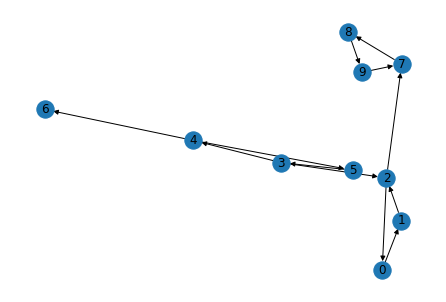

In [30]:
G = nx.DiGraph()
G.add_nodes_from(range(0,10))
nx.add_cycle(G,[0,1,2])
nx.add_cycle(G,[3,4,5])
nx.add_cycle(G,[7,8,9])
G.add_edges_from([(3,2), (2,7), (4,6), (6,6)])

# define pos according to spring layout
# to fix nodes' positions in all graph drawings.
# spring_layout positions nodes using Fruchterman-Reingold force-directed algorithm.
pos = nx.spring_layout(G)
nx.draw(G,pos, with_labels=True)

Perform the computation of the extremal eigenvectors of G.

1. Find the attractive components of G
2. For each attractive component, construct the corresponding induced subgraph
3. Compute the P matrix of each induced subgraph and its invariant measure
4. Map the obtained measures back to the original graph G (by adding zeros in the appropriate positions)

**Hint**: use the methods introduced in the previous notebook, the code of the last lecture, and the following theorem

**Theorem**: the multeplicity of the eigenvalue 1 equals the number of attractive components (or trapping sets, as defined in the lecture notes) of the graph. Moreover, for every attractive component, there exists a dominant eigenvector (called extremal) whose support is exactly the node set of the attractive component.

In [31]:
# Point 1: find the attractive components by using NetworkX functions
attr_components = tuple(nx.algorithms.components.attracting_components(G))

print(attr_components)

({8, 9, 7}, {6})


In [32]:
for c in attr_components:
    # Point 2: construct the induced subgraph with nodes from the attractive component c
    sG = G.subgraph(c)
    # Point 3: compute the P matrix of each induced subgraph
    # construct the matrix P on the subgraph
    W = nx.adjacency_matrix(sG)
    W = W.toarray()
    degrees = np.sum(W,axis=1)
    D = np.diag(degrees)
    P = np.linalg.inv(D) @ W
    # find the extremal dominant eigenvector corresponding to component c
    w,v = np.linalg.eig(P.T)
    for index in [i for i in range(len(sG)) if np.isclose(w[i],1)]: 
        pi = v[:,index].real  # -> eigenvectors are complex but pi is real, so we convert it to real
        pi = pi/np.sum(pi)
    # map pi back in the original node space
    pi_G = np.zeros(len(G))
    for i in range(len(sG)):
        pi_G[list(sG.nodes)[i]] = pi[i]
    print("pi:", pi_G)

pi: [0.         0.         0.         0.         0.         0.
 0.         0.33333333 0.33333333 0.33333333]
pi: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


Note that the matrix $P$ of the induced subgraph with node set $c$ is equivalent to the restriction of the original $P$ on the node set $c$ (except for a permutation of the nodes).

In [33]:
# compute P on the induced subgraphs and print it
for c in attr_components:
    sG = G.subgraph(c)
    # construct the matrix P on the subgraph
    W = nx.adjacency_matrix(sG)
    W = W.toarray()
    degrees = np.sum(W,axis=1)
    D = np.diag(degrees)
    P = np.linalg.inv(D) @ W
    print("P on the subgraph c: \n", P, "\n")
    
# compute the original P and print it
W = nx.adjacency_matrix(G)
W = W.toarray()
degrees = np.sum(W,axis=1)
D = np.diag(degrees)
P = np.linalg.inv(D) @ W
print("The original P: \n", P, "\n")

P on the subgraph c: 
 [[0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]] 

P on the subgraph c: 
 [[1.]] 

The original P: 
 [[0.  1.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  1.  0.  0.  0.  0.  0.  0.  0. ]
 [0.5 0.  0.  0.  0.  0.  0.  0.5 0.  0. ]
 [0.  0.  0.5 0.  0.5 0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.5 0.5 0.  0.  0. ]
 [0.  0.  0.  1.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  1.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  1.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  1. ]
 [0.  0.  0.  0.  0.  0.  0.  1.  0.  0. ]] 



This is due to the fact that 'c' are attractive components, thus they do not have links that connect nodes in 'c' to nodes not belonging to 'c'.

Thus, $P_c$ could be obtained without recomputing the matrices of the graph $G_c$.

### Exercise Katz centrality

In [34]:
W = nx.adjacency_matrix(G)
W = W.toarray()

# compute the largest eigenvalue of W
w,v = np.linalg.eig(W)
w = w.real

lambda_max = max(w) 

beta = 0.15
mu = np.ones((N,1))

z_0 = np.ones((N,1))/N
# set a tolerance to assess convergence to the limit
tol = 1e-5
# evolve the dynamics
z_old = z_0

while True:
    z_new = W.T @ z_old * (1-beta)/lambda_max + beta * mu
    if np.linalg.norm(z_new-z_old) < tol:
        break
    z_old=z_new

zk_approx = z_new

# normalize the centrality
zk_approx = zk_approx / sum(zk_approx)

# print the shapes of the two centralities
print(zk_approx.shape)
print(zk.shape)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 14 is different from 10)

In [ ]:
# since they are in same shape, the comparison can be done
print("Distance:", np.linalg.norm(zk_approx-zk))

### Exercise speed of convergence Bonacich

In [35]:
fig = plt.figure(1, figsize=(16,7))

# set 3 iteration numbers
iters = [10,15,50]
# define the position of the next plot in the subplot grid
position = 1
# create a list to collect the page rank values obtained in the three runs 
prvals = []

for max_iter in iters:
    # compute page rank
    z_0 = np.ones((N,1))/N
    z_old = z_0
    
    while True:
        z_new = P.T @ z_old * (1-beta) + beta * mu
        if np.linalg.norm(z_new-z_old) < tol:
            break
        z_old=z_new

    pr = z_new

    # normalize the centrality
    prval = pr / sum(pr)
    
    # append the result to the list
    prvals.append(np.array(prval)) 
    # create a new sublot in the grid
    ax = fig.add_subplot(2,2,position)
    # plot the PR values
    ax.plot(prval, color=np.random.rand(3), label='{0:d} iterations'.format(max_iter))
    position+=1

# add a legend which contains all label
# informations specified in previous plot calls
fig.legend()

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 14 is different from 10)

<Figure size 1152x504 with 0 Axes>